In [1]:
#job replacement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ss=pd.read_csv(r"/content/Modified_Job_Placement_Data.csv")
ss.head()

,Sex,High_School_Score,High_School_Board,Senior_School_Score,Senior_School_Board,Senior_School_Stream,Bachelor_Degree_Score,Bachelor_Degree_Type,Work_Experience,Aptitude_Test_Score,MBA_Specialization,MBA_Percentage,Job_Status
0,Male,67.00,State,91.00,State,Commerce,58.00,Science & Technology,No,55.0,Marketing & HR,58.80,Hired
1,Male,79.33,National,78.33,State,Science,77.48,Science & Technology,Yes,86.5,Marketing & Finance,66.28,Hired
2,Male,65.00,National,68.00,National,Arts,64.00,Commerce & Management,No,75.0,Marketing & Finance,57.80,Hired
3,Male,56.00,National,52.00,National,Science,52.00,Science & Technology,No,66.0,Marketing & HR,59.43,Not Hired
4,Male,85.80,National,73.60,National,Commerce,73.30,Commerce & Management,No,96.8,Marketing & Finance,55.50,Hired


In [3]:
ss.shape

(215, 13)

In [4]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    215 non-null    object 
 1   High_School_Score      215 non-null    float64
 2   High_School_Board      215 non-null    object 
 3   Senior_School_Score    215 non-null    float64
 4   Senior_School_Board    215 non-null    object 
 5   Senior_School_Stream   215 non-null    object 
 6   Bachelor_Degree_Score  215 non-null    float64
 7   Bachelor_Degree_Type   215 non-null    object 
 8   Work_Experience        215 non-null    object 
 9   Aptitude_Test_Score    215 non-null    float64
 10  MBA_Specialization     215 non-null    object 
 11  MBA_Percentage         215 non-null    float64
 12  Job_Status             215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [5]:
ss.isnull().sum()

,0
Sex,0
High_School_Score,0
High_School_Board,0
Senior_School_Score,0
Senior_School_Board,0
Senior_School_Stream,0
Bachelor_Degree_Score,0
Bachelor_Degree_Type,0
Work_Experience,0
Aptitude_Test_Score,0


In [6]:
ss.duplicated().sum()

0

In [7]:
ss.describe()

,High_School_Score,Senior_School_Score,Bachelor_Degree_Score,Aptitude_Test_Score,MBA_Percentage
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


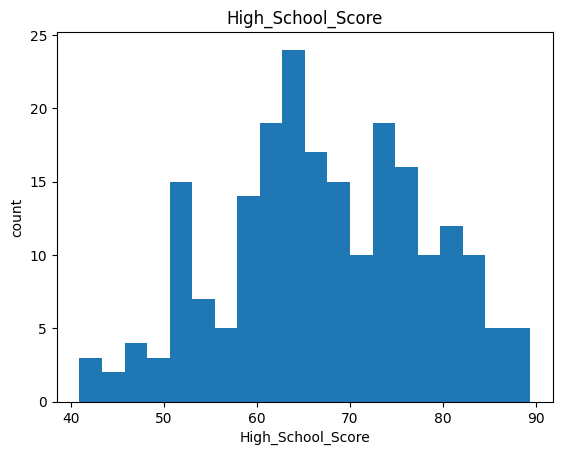

In [8]:
# in describe section not mentioned categerical data
#EDA
plt.hist(ss["High_School_Score"],bins=20)
plt.title("High_School_Score")
plt.xlabel("High_School_Score")
plt.ylabel("count")
plt.show()

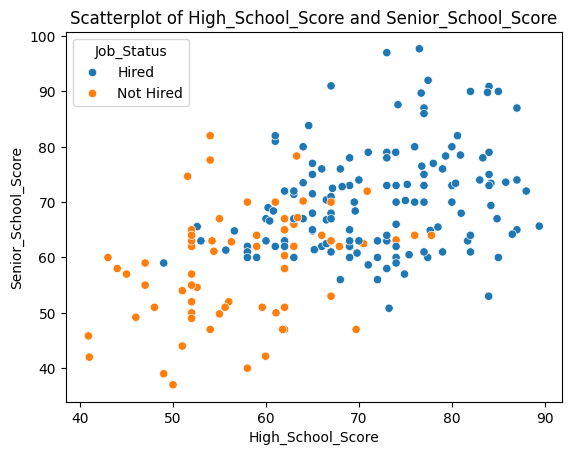

In [9]:
#scatterplot to check job_status
sns.scatterplot(x="High_School_Score",y="Senior_School_Score",data=ss,hue="Job_Status")
plt.xlabel("High_School_Score")
plt.ylabel("Senior_School_Score")
plt.title("Scatterplot of High_School_Score and Senior_School_Score")
plt.show()

In [10]:
ss["Job_Status"].value_counts()

,count
Job_Status,
Hired,148
Not Hired,67


In [11]:
categorical_cols = ss.select_dtypes(include=['object']).columns.tolist()
print(ss.columns.tolist())  # Print all available column names


['Sex', 'High_School_Score', 'High_School_Board', 'Senior_School_Score', 'Senior_School_Board', 'Senior_School_Stream', 'Bachelor_Degree_Score', 'Bachelor_Degree_Type', 'Work_Experience', 'Aptitude_Test_Score', 'MBA_Specialization', 'MBA_Percentage', 'Job_Status']


In [12]:
# Select only object-type (categorical) columns



#ss = pd.get_dummies(ss, columns=[, drop_first=True)
# Apply get_dummies only on categorical columns
ss = pd.get_dummies(ss, columns=categorical_cols, drop_first=True)
ss.head()




,High_School_Score,Senior_School_Score,Bachelor_Degree_Score,Aptitude_Test_Score,MBA_Percentage,Sex_Male,High_School_Board_State,Senior_School_Board_State,Senior_School_Stream_Commerce,Senior_School_Stream_Science,Bachelor_Degree_Type_Others,Bachelor_Degree_Type_Science & Technology,Work_Experience_Yes,MBA_Specialization_Marketing & HR,Job_Status_Not Hired
0,67.00,91.00,58.00,55.0,58.80,True,True,True,True,False,False,True,False,True,False
1,79.33,78.33,77.48,86.5,66.28,True,False,True,False,True,False,True,True,False,False
2,65.00,68.00,64.00,75.0,57.80,True,False,False,False,False,False,False,False,False,False
3,56.00,52.00,52.00,66.0,59.43,True,False,False,False,True,False,True,False,True,True
4,85.80,73.60,73.30,96.8,55.50,True,False,False,True,False,False,False,False,False,False


In [13]:
# Convert all boolean (True/False) columns to integer (0/1)
ss = ss.astype(int)

 # Check the transformed DataFrame
ss.head()


,High_School_Score,Senior_School_Score,Bachelor_Degree_Score,Aptitude_Test_Score,MBA_Percentage,Sex_Male,High_School_Board_State,Senior_School_Board_State,Senior_School_Stream_Commerce,Senior_School_Stream_Science,Bachelor_Degree_Type_Others,Bachelor_Degree_Type_Science & Technology,Work_Experience_Yes,MBA_Specialization_Marketing & HR,Job_Status_Not Hired
0,67,91,58,55,58,1,1,1,1,0,0,1,0,1,0
1,79,78,77,86,66,1,0,1,0,1,0,1,1,0,0
2,65,68,64,75,57,1,0,0,0,0,0,0,0,0,0
3,56,52,52,66,59,1,0,0,0,1,0,1,0,1,1
4,85,73,73,96,55,1,0,0,1,0,0,0,0,0,0


In [14]:
ss.columns = ss.columns.str.strip()  # Removes leading/trailing spaces

x=ss.drop("High_School_Score",axis=1)
y=ss["High_School_Score"]
#

In [15]:

ss.head()


,High_School_Score,Senior_School_Score,Bachelor_Degree_Score,Aptitude_Test_Score,MBA_Percentage,Sex_Male,High_School_Board_State,Senior_School_Board_State,Senior_School_Stream_Commerce,Senior_School_Stream_Science,Bachelor_Degree_Type_Others,Bachelor_Degree_Type_Science & Technology,Work_Experience_Yes,MBA_Specialization_Marketing & HR,Job_Status_Not Hired
0,67,91,58,55,58,1,1,1,1,0,0,1,0,1,0
1,79,78,77,86,66,1,0,1,0,1,0,1,1,0,0
2,65,68,64,75,57,1,0,0,0,0,0,0,0,0,0
3,56,52,52,66,59,1,0,0,0,1,0,1,0,1,1
4,85,73,73,96,55,1,0,0,1,0,0,0,0,0,0


In [16]:
# train model
x=ss.drop("Job_Status_Not Hired",axis=1)
y=ss["Job_Status_Not Hired"]

In [17]:
y

,Job_Status_Not Hired
0,0
1,0
2,0
3,1
4,0
...,...
210,0
211,0
212,0
213,0


In [18]:
x.shape

(215, 14)

In [19]:
y.shape

(215,)

In [20]:
ss.shape

(215, 15)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape

(172, 14)

In [23]:
x_test.shape

(43, 14)

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred=lr.predict(x_test)

In [26]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [27]:
from sklearn .metrics import accuracy_score


In [28]:
accuracy_score(y_test,y_pred)*100

88.37209302325581

In [29]:
input_data=(56,52,52,66,59,1,0,0,0,1,0,1,0,1)
np_array=np.asarray(input_data)
reshaped_array=np_array.reshape(1,-1)
prediction=lr.predict(reshaped_array)
if prediction[0]==0:
  print("not hired")
else:
  print("hired")

hired


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
import pickle


In [31]:
pickle.dump(lr,open("palcaemet.pkl","wb"))